# MED Lab 2023/2024 - Projekt Zaliczeniowy
Zadaniem tego projektu indywidualnego jest zaliczenie laboratorium z MED.

Projekt należy wykonać **bez użycia jakichkolwiek innych bibliotek/pakietów, niż te, które zostały podane w pakietach podstawowych**

Poniższe zadania mają potwierdzić posiadane przez Państwa umiejętności budowania algorytmów uczenia maszynowego i  modelowania regresji na przykładzie danych zawierających ceny nieruchomości znajdujących się w pliku "domy.csv". W zadaniu należy wykorzystać wiedzę poznaną na laboratorium i wykładzie w tym metody regularyzacji, metody wyboru i tworzenia nowych zmiennych, określenie jakości modelu.

**Projekt należy wgrać na ISOD do 11.12.2023**

Z projektu można zdobyć 50 pkt. Za każde zadanie można dostać od 0 do 10 pkt.

Można korzystać z dowolnych źródeł.

### Uwaga !!!
Każda osoba pracuje na inaczej podzielonych danych zależnych od numeru indeksu, więc podanie wniosków nieadekwatnych do otrzymanych wyników będzie uznane za próbę ściągania i karane niezaliczeniem projektu, a co za tym idzie przedmiotu.

In [1]:
# Wczytanie pakietów podstawowych
import numpy as np
import pandas as pd

In [2]:
# Wczytanie danych
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
domy = pd.read_csv("domy.csv", sep=',', dtype=dtype_dict)
domy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


### Podział danych zostanie dokonany zależnie od numeru indeksu

In [3]:
from sklearn.model_selection import train_test_split
# !!!Jako random_state podaj swój numer indeksu!!!
numer_indeksu = 319093
ceny = domy['price']
domy.drop('price', axis=1, inplace=True)
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)
cechy = domy.columns.values
cechy 

array(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

## Zadanie 1
Dokonaj analizy posiadanych zmiennych. Zakresy zmienności, korelacje, skośność. Dane nieużyteczne jak np. id można odrzucić. 

Zaproponuj 5 nowych cech będących wynikiem przeprowadzonych analiz lub doświadczeń.

In [4]:
domy_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1817,1337300070,20140924T000000,4.0,2.25,3180.0,6105,2,0,0,3,10,3180,0,1905,0,98112,47.6255,-122.314,3180.0,6029.0
313,4139480200,20140618T000000,4.0,3.25,4290.0,12103,1,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860.0,11244.0
10343,1172000135,20140731T000000,4.0,2.00,1940.0,6350,1,0,0,4,7,970,970,1951,0,98103,47.6948,-122.357,960.0,6350.0
17966,2556500040,20150106T000000,3.0,1.00,1230.0,7492,1,0,0,3,7,1230,0,1955,0,98155,47.7633,-122.315,1710.0,7238.0
10187,8568010310,20140912T000000,3.0,2.50,2300.0,27566,2,0,0,3,9,2300,0,1995,0,98019,47.7369,-121.960,2480.0,16650.0


In [5]:
domy_train.drop('id', axis=1, inplace=True)
domy_test.drop('id', axis=1, inplace=True)
domy_train.drop('date', axis=1, inplace=True)
domy_test.drop('date', axis=1, inplace=True)
domy_train.drop('zipcode', axis=1, inplace=True)
domy_test.drop('zipcode', axis=1, inplace=True)

# Uznalem za zbedne kolumny id, date i zipcode, poniewaz nie maja one wplywu na cene domu

In [6]:
# Kolumny zawierajace dane liczbowe do policzenia zakresu zmiennosci
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15']

In [7]:
domy_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14480 entries, 1817 to 7734
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       14480 non-null  float64
 1   bathrooms      14480 non-null  float64
 2   sqft_living    14480 non-null  float64
 3   sqft_lot       14480 non-null  int32  
 4   floors         14480 non-null  object 
 5   waterfront     14480 non-null  int32  
 6   view           14480 non-null  int32  
 7   condition      14480 non-null  int32  
 8   grade          14480 non-null  int32  
 9   sqft_above     14480 non-null  int32  
 10  sqft_basement  14480 non-null  int32  
 11  yr_built       14480 non-null  int32  
 12  yr_renovated   14480 non-null  int32  
 13  lat            14480 non-null  float64
 14  long           14480 non-null  float64
 15  sqft_living15  14480 non-null  float64
 16  sqft_lot15     14480 non-null  float64
dtypes: float64(7), int32(9), object(1)
memory usage: 1.5+

In [8]:
domy_train['floors'] = domy_train['floors'].astype('float64')
domy_test['floors'] = domy_test['floors'].astype('float64')

In [9]:
domy_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,14480.000000,14480.000000,14480.000000,1.448000e+04,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000
mean,3.374724,2.118318,2085.415539,1.484308e+04,1.498619,0.007528,0.230939,3.402624,7.657942,1793.456285,291.959254,1971.237914,80.232113,47.559720,-122.213374,1989.538398,12586.206975
std,0.913511,0.776754,925.727340,4.064454e+04,0.541717,0.086438,0.764199,0.643020,1.181235,829.804645,445.575491,29.413165,392.095299,0.138682,0.141133,688.595348,26121.721375
min,0.000000,0.000000,290.000000,6.000000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.176400,-122.519000,460.000000,659.000000
25%,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,47.470275,-122.327000,1480.000000,5100.000000
50%,3.000000,2.250000,1920.000000,7.636000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571150,-122.229000,1840.000000,7632.000000
75%,4.000000,2.500000,2560.000000,1.065000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,47.678300,-122.125000,2370.000000,10089.250000
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>],
       [<Axes: title={'center': 'sqft_lot15'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

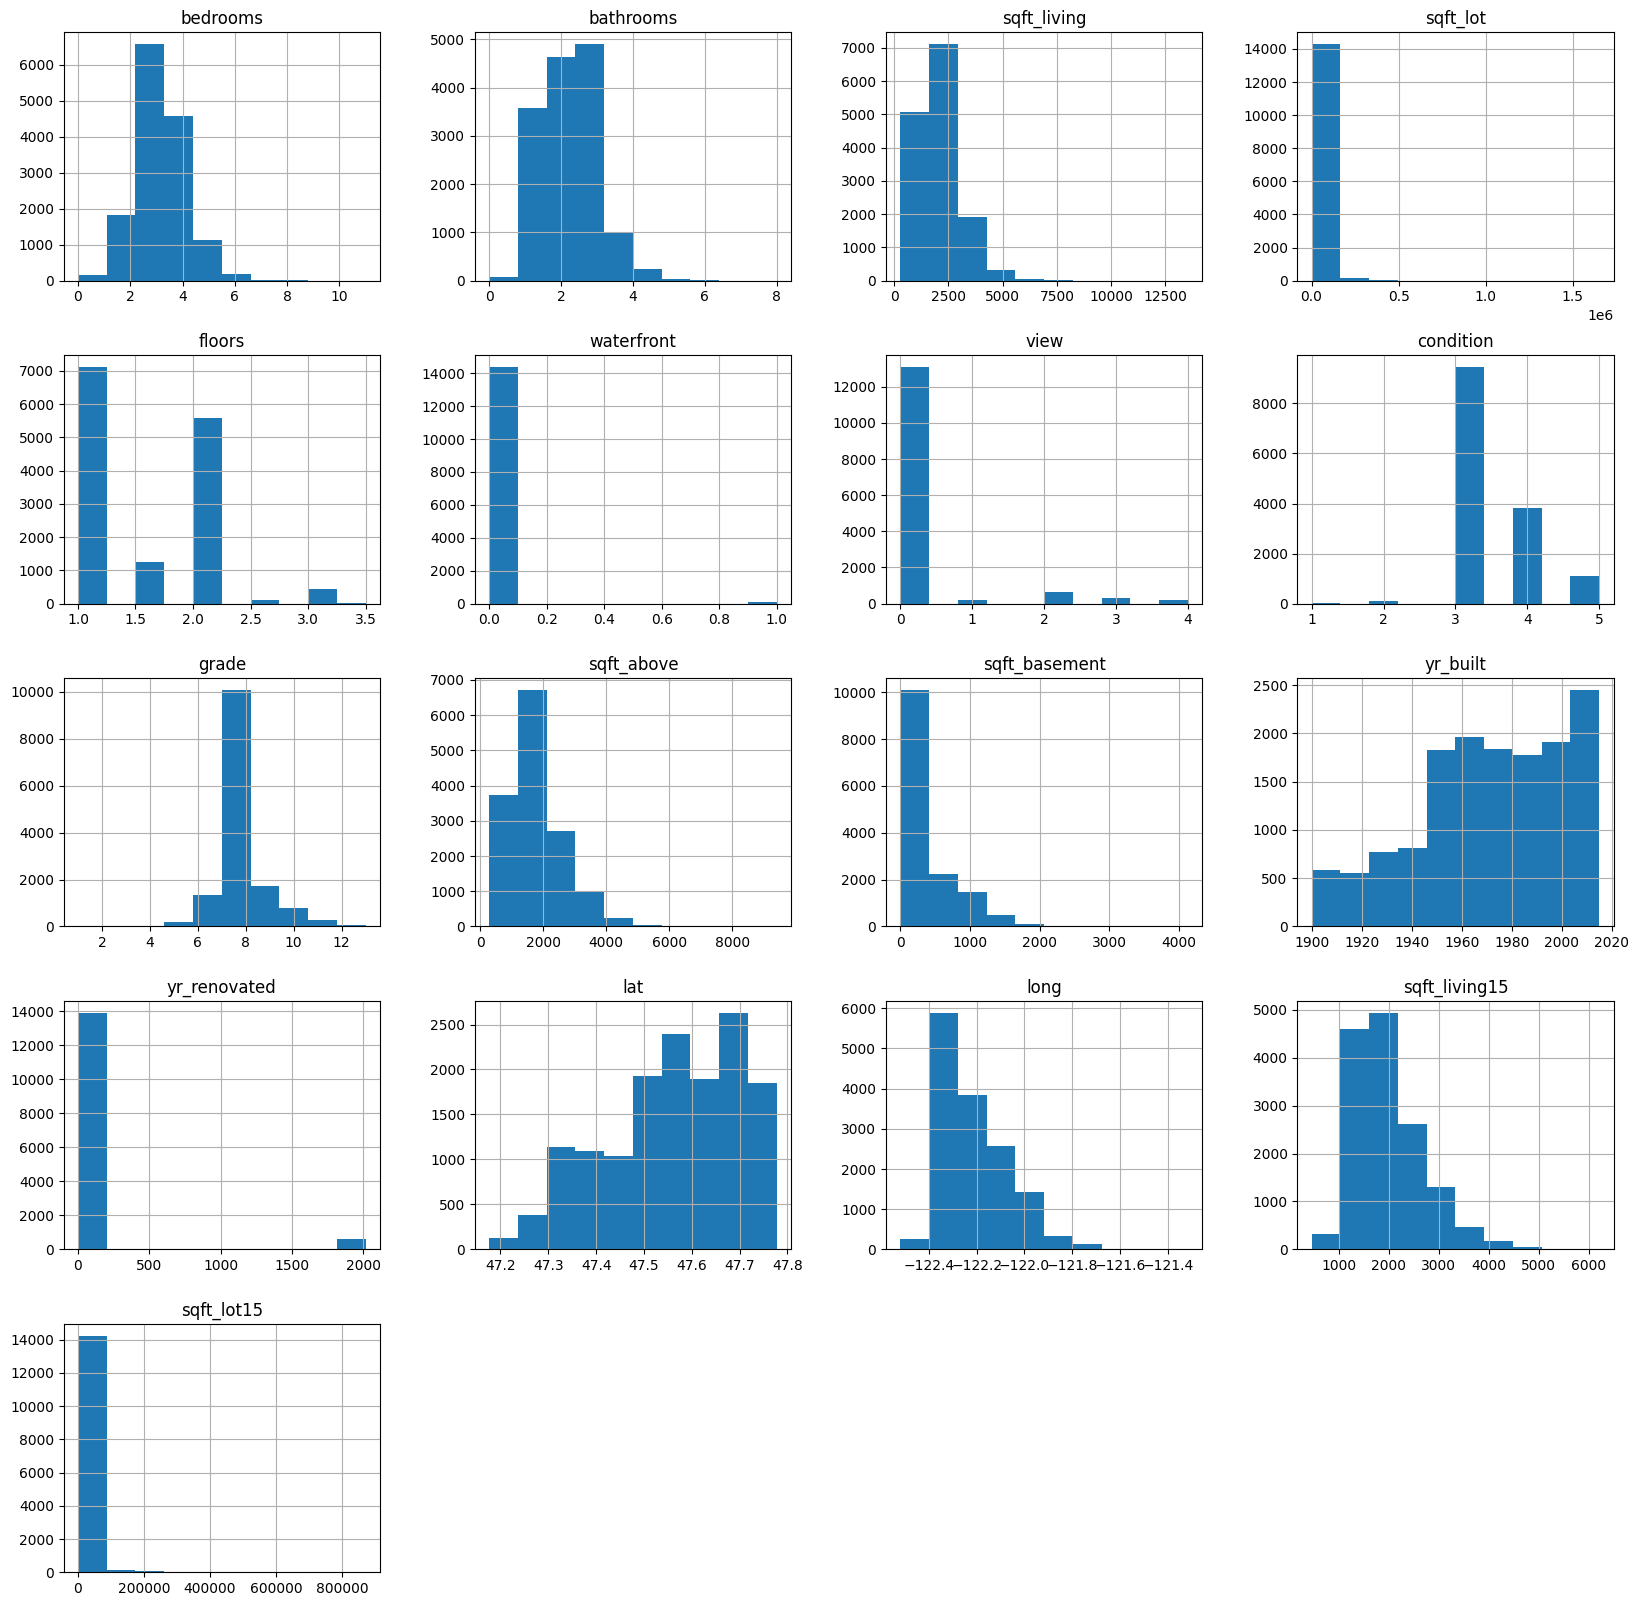

In [10]:
domy_train.hist(figsize=(20,20))

In [11]:
# Zakresy zmiennosci, mediany oraz srednie dla kolumn zawierajacych dane liczbowe
for col in columns:
    var_range = domy_train[col].max() - domy_train[col].min()
    print(f"Zakres zmiennosci {col} wynosi {var_range}, a mediana {domy_train[col].median()}, a srednia {domy_train[col].mean()}")

Zakres zmiennosci bedrooms wynosi 11.0, a mediana 3.0, a srednia 3.3747237569060773
Zakres zmiennosci bathrooms wynosi 8.0, a mediana 2.25, a srednia 2.118318370165746
Zakres zmiennosci sqft_living wynosi 13250.0, a mediana 1920.0, a srednia 2085.415538674033
Zakres zmiennosci sqft_lot wynosi 1650759, a mediana 7636.0, a srednia 14843.075138121547
Zakres zmiennosci floors wynosi 2.5, a mediana 1.5, a srednia 1.4986187845303867
Zakres zmiennosci waterfront wynosi 1, a mediana 0.0, a srednia 0.007527624309392265
Zakres zmiennosci view wynosi 4, a mediana 0.0, a srednia 0.23093922651933702
Zakres zmiennosci condition wynosi 4, a mediana 3.0, a srednia 3.402624309392265
Zakres zmiennosci grade wynosi 12, a mediana 7.0, a srednia 7.6579419889502764
Zakres zmiennosci sqft_above wynosi 9120, a mediana 1560.0, a srednia 1793.4562845303867
Zakres zmiennosci sqft_basement wynosi 4130, a mediana 0.0, a srednia 291.95925414364643
Zakres zmiennosci yr_built wynosi 115, a mediana 1975.0, a srednia 1

In [12]:
# Korelacje pomiedzy zmiennymi
correlations = domy_train[columns].corr()
hist = correlations.style.background_gradient(cmap='coolwarm').format("{:.2f}")
hist

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
bedrooms,1.00,0.53,0.59,0.03,0.18,-0.01,0.08,0.02,0.37,0.50,0.31,0.17,0.01,-0.01,0.14,0.40,0.04
bathrooms,0.53,1.00,0.76,0.08,0.50,0.06,0.19,-0.12,0.67,0.69,0.29,0.51,0.04,0.02,0.22,0.57,0.09
sqft_living,0.59,0.76,1.00,0.17,0.36,0.10,0.28,-0.06,0.76,0.88,0.44,0.33,0.05,0.05,0.24,0.76,0.19
sqft_lot,0.03,0.08,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.17,0.03,0.05,0.00,-0.07,0.22,0.15,0.73
floors,0.18,0.50,0.36,-0.01,1.00,0.02,0.03,-0.27,0.46,0.53,-0.24,0.50,0.01,0.05,0.13,0.28,-0.01
waterfront,-0.01,0.06,0.10,0.02,0.02,1.00,0.41,0.02,0.08,0.07,0.09,-0.02,0.08,-0.01,-0.04,0.09,0.03
view,0.08,0.19,0.28,0.07,0.03,0.41,1.00,0.06,0.25,0.16,0.28,-0.06,0.10,0.01,-0.08,0.27,0.06
condition,0.02,-0.12,-0.06,-0.01,-0.27,0.02,0.06,1.00,-0.14,-0.16,0.17,-0.36,-0.06,-0.01,-0.11,-0.09,0.00
grade,0.37,0.67,0.76,0.11,0.46,0.08,0.25,-0.14,1.00,0.76,0.18,0.45,0.01,0.11,0.19,0.71,0.12
sqft_above,0.50,0.69,0.88,0.17,0.53,0.07,0.16,-0.16,0.76,1.00,-0.04,0.43,0.02,-0.00,0.34,0.74,0.19


In [13]:
# Zmienna o najwiekszej korelacji dodatniej
high_corr = correlations[correlations > 0.6]
high_corr = high_corr[high_corr < 1]

highly_correlated_vars = (
    high_corr
    .unstack()
    .sort_values(ascending=False)
    .drop_duplicates()
    .reset_index()
)

# Filter pairs with correlation > 0.6
highly_correlated_pairs = highly_correlated_vars[highly_correlated_vars[0] > 0.6]
print("Pairs of variables with correlation > 0.6:")
print(highly_correlated_pairs)

# Zmienna o najwiekszej korelacji ujemnej
high_corr = correlations[correlations < -0.6]
high_corr = high_corr[high_corr > -1]

highly_correlated_vars = (
    high_corr
    .unstack()
    .sort_values(ascending=False)
    .drop_duplicates()
    .reset_index()
)

# Filter pairs with correlation < -0.6
highly_correlated_pairs = highly_correlated_vars[highly_correlated_vars[0] < -0.6]
print("Pairs of variables with correlation < -0.6:")
print(highly_correlated_pairs)

Pairs of variables with correlation > 0.6:
       level_0        level_1         0
0  sqft_living     sqft_above  0.876762
1        grade    sqft_living  0.764232
2    bathrooms    sqft_living  0.759232
3   sqft_above          grade  0.757109
4  sqft_living  sqft_living15  0.756587
5   sqft_above  sqft_living15  0.735178
6     sqft_lot     sqft_lot15  0.734945
7        grade  sqft_living15  0.713364
8   sqft_above      bathrooms  0.692731
9        grade      bathrooms  0.667565
Pairs of variables with correlation < -0.6:
Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []


In [176]:
# Na podstawie korelacji mozemy ze wiele zmiennych jest ze soba scisle dodatnio skorelowanych, przede wszystkim powierzchnia koreluje z wieloma innymi zmiennymi, co jest oczywiste
# Ponadto widzimy ze nie ma zmiennych ze soba scisle ujemnie skorelowanych

In [14]:
# Skosnosc danych liczbowych
# Im wartosc skosnosci jest blizsza 0, tym dane sa bardziej symetryczne

print("Skosnosc danych liczbowych")
for col in columns:
    print(f"{col} wynosi {domy_train[col].skew()}")
# podane wartosci potwierdzaja dane z histogramow

Skosnosc danych liczbowych
bedrooms wynosi 0.5205610732909772
bathrooms wynosi 0.5109830987584433
sqft_living wynosi 1.4807638908884542
sqft_lot wynosi 14.138044099997686
floors wynosi 0.6070617314185555
waterfront wynosi 11.396426164902413
view wynosi 3.44179743147355
condition wynosi 1.0614986774351873
grade wynosi 0.7494294198921733
sqft_above wynosi 1.419626712938172
sqft_basement wynosi 1.5681871989962959
yr_built wynosi -0.47903448167411594
yr_renovated wynosi 4.683016735443283
lat wynosi -0.475809054250569
long wynosi 0.9156657795411651
sqft_living15 wynosi 1.1054169209327094
sqft_lot15 wynosi 9.267908687136316


In [129]:

# Nowe cechy zaproponowane przeze mnie
# 1. Floors * sqft_living 
# 2. grade + bedrooms
# 3. yr_built + yr_renovated
# 4. condition * view
# 5. bedrooms * bathrooms * sqft_living


In [15]:
# 1. Floors * sqft_living
domy_train['floors_sqft_living'] = domy_train['floors'] * domy_train['sqft_living']
domy_test['floors_sqft_living'] = domy_test['floors'] * domy_test['sqft_living']

# 2. grade + bedrooms
domy_train['grade_bedrooms'] = domy_train['grade'] + domy_train['bedrooms']
domy_test['grade_bedrooms'] = domy_test['grade'] + domy_test['bedrooms']

# 3. yr_built - yr_renovated
domy_train['yr_built_yr_renovated'] = domy_train['yr_built'] + domy_train['yr_renovated']
domy_test['yr_built_yr_renovated'] = domy_test['yr_built'] + domy_test['yr_renovated']

# 4. condition * view
domy_train['condition_view'] = domy_train['condition'] * domy_train['view']
domy_test['condition_view'] = domy_test['condition'] * domy_test['view']

# 5. bedrooms * bathrooms * sqft_living
domy_train['bedrooms_bathrooms_sqft_living'] = domy_train['bedrooms'] * domy_train['bathrooms'] * domy_train['sqft_living']
domy_test['bedrooms_bathrooms_sqft_living'] = domy_test['bedrooms'] * domy_test['bathrooms'] * domy_test['sqft_living']



In [16]:
domy_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,lat,long,sqft_living15,sqft_lot15,floors_sqft_living,grade_bedrooms,yr_built_yr_renovated,condition_view,bedrooms_bathrooms_sqft_living
1817,4.0,2.25,3180.0,6105,2.0,0,0,3,10,3180,...,0,47.6255,-122.314,3180.0,6029.0,6360.0,14.0,1905,0,28620.0
313,4.0,3.25,4290.0,12103,1.0,0,3,3,11,2690,...,0,47.5503,-122.102,3860.0,11244.0,4290.0,15.0,1997,9,55770.0
10343,4.0,2.00,1940.0,6350,1.0,0,0,4,7,970,...,0,47.6948,-122.357,960.0,6350.0,1940.0,11.0,1951,0,15520.0
17966,3.0,1.00,1230.0,7492,1.0,0,0,3,7,1230,...,0,47.7633,-122.315,1710.0,7238.0,1230.0,10.0,1955,0,3690.0
10187,3.0,2.50,2300.0,27566,2.0,0,0,3,9,2300,...,0,47.7369,-121.960,2480.0,16650.0,4600.0,12.0,1995,0,17250.0


## Zadanie 2
Napisz metodę regresji krokowej w tył i za jej pomocą wybierz 5 najbardziej wartościowych cech.

In [17]:
new_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'floors_sqft_living', 'grade_bedrooms', 'yr_built_yr_renovated', 'condition_view', 'bedrooms_bathrooms_sqft_living']

In [18]:
# za pomoca tej funkcji obliczamy wspolczynniki
def compute_coeffs(feature_matrix, output_train):
    pinw = np.linalg.pinv(feature_matrix)
    weights = np.dot(pinw, output_train)
    return weights

In [19]:

# za pomoca tej funkcji przewidujemy ceny domow
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [20]:
def rss(coeffs, data, outcome):
    predictions = predict_output(data, coeffs)
    errors = np.subtract(outcome, predictions)
    RSS = np.dot(errors, errors)
    
    return(RSS)

In [73]:
coeffs = compute_coeffs(domy_train[new_columns], ceny_train)
rss(coeffs, domy_test[new_columns], ceny_test)


278521990493028.6

In [22]:
def backward_stepwise_regression(X, y, num_features):
    selected_features = list(X.columns)
    num_features_to_select = len(selected_features) - num_features
    iter = 0
    while num_features_to_select > 0:
        best_feature = None
        best_score = np.inf
        iter += 1
        for feature in selected_features:
            remaining_features = selected_features.copy()
            remaining_features.remove(feature)
            
            coeffs = compute_coeffs(X[remaining_features], y)
            score = rss(coeffs, X[remaining_features], y)
            

            
            if score < best_score:
                best_feature = feature
                best_score = score
        
        selected_features.remove(best_feature)
        num_features_to_select -= 1
        # print(f"Best feature: {best_feature}, best score: {best_score}")
        # print(f"Number of features left: {num_features_to_select}")
        # print(f"Iteration: {iter}")
    print(best_score)
    return selected_features

In [23]:

selected_features = backward_stepwise_regression(domy_train[columns], ceny_train, 5)
print(selected_features)

# wynik bez dodanych kolumn z zad 1
# best_features = ['sqft_living', 'waterfront', 'grade', 'yr_built', 'lat']
# score = 683774450674935.0

# z dodanymi moimi kolumnami
# score = 736902586635991.1
          
# best_features = ['grade', 'yr_renovated', 'lat', 'yr_built_yr_renovated', 'bedrooms_bathrooms_sqft_living']

# Jak widac regresja krokowa w tyl daje wiekszy wynik bledu przy zmiennych ktore wybralem
# Ponadto ten model zapewnial najlepsze wyniki dla wszystkich poczatkowych kolumn
# score = 278521990493028.6

683774450674935.0
['sqft_living', 'waterfront', 'grade', 'yr_built', 'lat']


In [24]:
# dla danych testowych
best_features_old = ['sqft_living', 'waterfront', 'grade', 'yr_built', 'lat']
best_features_new = ['grade', 'yr_renovated', 'lat', 'yr_built_yr_renovated', 'bedrooms_bathrooms_sqft_living']

old_test_coeffs = compute_coeffs(domy_test[best_features_old], ceny_test)
new_test_coeffs = compute_coeffs(domy_test[best_features_new], ceny_test)

old_test_rss = rss(old_test_coeffs, domy_test[best_features_old], ceny_test)
new_test_rss = rss(new_test_coeffs, domy_test[best_features_new], ceny_test)

print(f"Old test RSS: {old_test_rss}")
print(f"New test RSS: {new_test_rss}")

# na danych testowych RSS jest mniejsze dla starych kolumn
print(f"Difference in RSS: {new_test_rss - old_test_rss}")


Old test RSS: 333966587826774.8
New test RSS: 341716985893171.56
Difference in RSS: 7750398066396.75


## Zadanie 3
Dokonaj normalizacji cech (wszystkie podane + 5 zaproponowanych w Zadaniu 1) i przy pomocy metody Lasso wybierz 5 najbardziej wartościowych cech. (Zadanie wymaga napisania metody optymalizacji dla regularyzacji Lasso)

!!! Przy przekształceniach unikaj korzystania z informacji zawartej w zbiorze walidacyjnym i testowym !!!

In [80]:
# Regularyzacja Lasso za pomoca spadku gradientu wspolrzednych
def lasso_regularization(X, y, alpha=0.1, num_iters=100):
    # Standaryzacja danych
    X = (X - X.mean()) / X.std()

    # Przekształcenie do macierzy numpy
    X = X.values
    y = y.values.flatten()

    # Inicjalizacja wag
    w = np.zeros(X.shape[1])

    # Wykonanie spadku gradientu wspolrzednych
    for _ in range(num_iters):
        for j in range(len(w)):
            tmp_w = w.copy()
            tmp_w[j] = 0.0
            r_j = y - np.dot(X, tmp_w)
            arg1 = np.dot(X[:, j], r_j) - alpha / 2 
            arg2 = -np.dot(X[:, j], r_j) - alpha / 2
            if arg1 > 0:
                w[j] = arg1 / (X[:, j]**2).sum()
            elif arg2 < 0:
                w[j] = arg2 / (X[:, j]**2).sum()
            else:
                w[j] = 0
    return w

# arg1 reprezentuje dodatnia wartosc progowa w operacji miekkiego progu dla wspolrzednej j,
# jesli arg1 jest dodatni oznacza to ze aktualizacja wagi nie spowoduje wyzerowania wagi
# arg2 reprezentuje ujemna wartosc progowa w operacji miekkiego progu dla wspolrzednej j,
# jesli arg2 jest ujemny oznacza to ze aktualizacja wagi nie spowoduje wyzerowania wagi
# w[j] = 0 w przeciwnym wypadku

In [83]:

# Perform Lasso regularization
weights = lasso_regularization(domy_train[new_columns], ceny_train, alpha=5e7, num_iters=1000)

# Get the top 5 features
top_features = pd.Series(weights, index=new_columns).nlargest(5).index.tolist()
    
print("Top 5 features:", top_features)

Top 5 features: ['grade', 'lat', 'bedrooms_bathrooms_sqft_living', 'sqft_living', 'view']


In [ ]:
# po wykonaniu regularyzacji Lasso otrzymujemy inne wyniki niz w przypadku regresji krokowej w tyl
# otrzymane wyniki regresji krokowej w tyl:
# cechy = ['sqft_living', 'waterfront', 'grade', 'yr_built', 'lat']

# otrzymane wyniki regularyzacji Lasso:
# cechy = ['grade', 'lat', 'bedrooms_bathrooms_sqft_living', 'sqft_living', 'view']

## Zadanie 4
Dla 5 wybranych w Zadaniu 3 cech dokonaj doboru współczynnika regularyzacji dla metody grzbietowej.
(Zadanie wymaga napisania dowolnej metody optymalizacji dla regularyzacji Ridge)

In [99]:
# cechy wybrane w zadaniu 3
zad_3_columns = ['grade', 'lat', 'bedrooms_bathrooms_sqft_living', 'sqft_living', 'view']
X_selected = domy_train[zad_3_columns].values
y = ceny_train.values.flatten()
alpha = 10  # dobrany doswiadczalnie hiperparametr poprzez wykonanie
            # walidacji krzyzowej dla roznych wartosci alpha

In [139]:
# Miejsce na regresje Ridge
def ridge_regression(X, y, alpha):
    num_features = X.shape[1]
    
    
    identity = np.identity(num_features)
    identity[0, 0] = 0 # wyrazu wolnego nie poddajmey regularyzacji
    weights = np.linalg.inv(X.T @ X + alpha * identity) @ X.T @ y
    
    return weights


In [140]:
weights = ridge_regression(X_selected, y, alpha)
print("Weights:", weights)

Weights: [ 9.60323735e+04 -9.79182589e+03  3.95676513e+00  8.25788517e+01
  1.03735324e+05]


In [ ]:
# Otrzymane wagi dla cech:
# ['grade', 'lat', 'bedrooms_bathrooms_sqft_living', 'sqft_living', 'view']
# Weights: [ 9.60323735e+04 -9.79182589e+03  3.95676513e+00  8.25788517e+01  1.03735324e+05]
# Widzimy ze regresja Ridge prawie wyzerowala wspolczynnik dodanej przez nas cechy oraz
# najbardziej wartosciowy wspolczynnik to grade

In [155]:

def k_fold_split(num_samples, k):
    indices = np.arange(num_samples)
    fold_sizes = np.full(k, num_samples // k, dtype=int)
    fold_sizes[:num_samples % k] += 1
    current = 0
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        yield indices[np.concatenate((indices[:start], indices[stop:]))], indices[start:stop]
        current = stop

# Walidacja krzyzowa dla regresji Ridge
def cross_validation_ridge(X, y, alphas, k=5):
    num_samples = X.shape[0]
    best_alpha = None
    best_avg_error = float('inf')
    errors = []
    
    for alpha in alphas:
        avg_error = 0
        
        for train_index, val_index in k_fold_split(num_samples, k):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            
            weights = ridge_regression(X_train, y_train, alpha)
            # Oblicz sredni blad kwadratowy (e.g., mean squared error)
            error = np.mean((np.dot(X_val, weights) - y_val) ** 2)
            avg_error += error
        print(f"Alpha: {alpha}, error: {avg_error}")
        errors.append(avg_error)
        avg_error /= k  # Policz srednia bledow dla k podzialow
        
        if avg_error < best_avg_error:
            best_avg_error = avg_error
            best_alpha = alpha
    
    return (best_alpha, errors)

Alpha: 0.001, error: 284435122833.28815
Alpha: 0.01, error: 284435122478.2569
Alpha: 0.1, error: 284435118934.6703
Alpha: 1, error: 284435084170.75964
Alpha: 10, error: 284434803511.7125
Alpha: 100.0, error: 284438484720.74304
Alpha: 1000.0, error: 284955740435.6841
Alpha: 10000.0, error: 295246044889.28595
Alpha: 100000.0, error: 310541680618.2131
Alpha: 1000000.0, error: 323652714647.93726
Alpha: 10000000.0, error: 333370200343.2666
Alpha: 50000000.0, error: 334785399723.86194
Alpha: 100000000.0, error: 334999371796.69275
Alpha: 1000000000.0, error: 337038857894.7687
Alpha: 10000000000.0, error: 346016622190.65265
Best alpha value found for Ridge: 10


<Axes: >

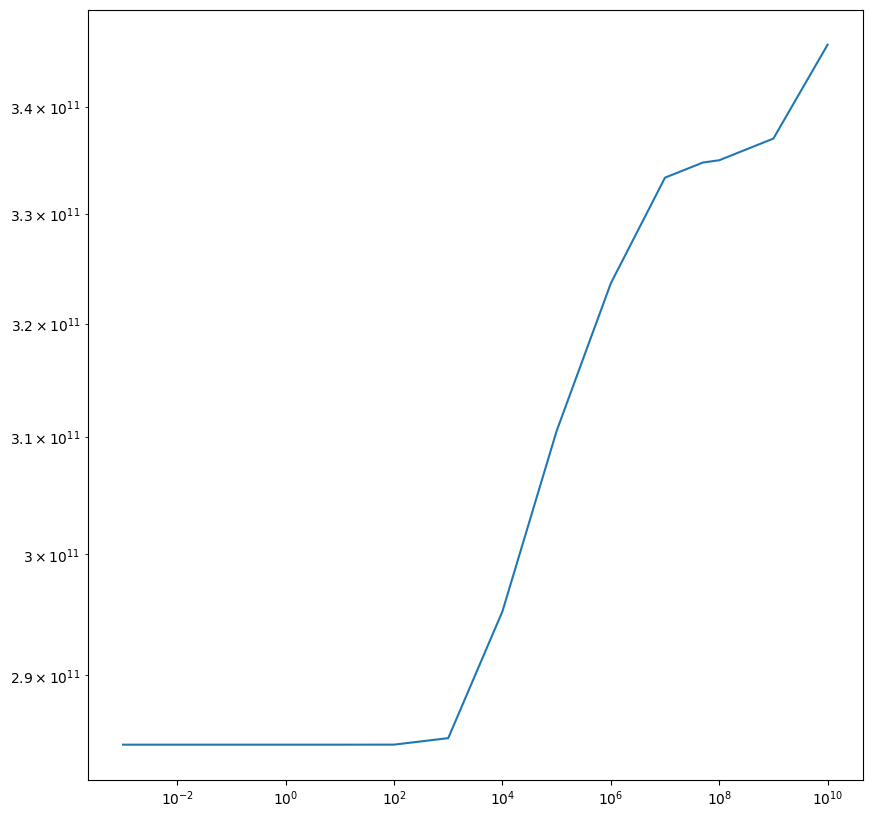

In [156]:

alphas_to_try = [0.001, 0.01, 0.1, 1, 10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 5e7, 1e8, 1e9, 1e10 ]

best_alpha, errors = cross_validation_ridge(X_selected, y, alphas_to_try)
if best_alpha is not None:
    print(f"Best alpha value found for Ridge: {best_alpha}")
else:
    print("No best alpha found within the given alphas.")

# Wykres bledow w zaleznosci od alpha
errors = pd.Series(errors, index=alphas_to_try)
errors.plot(logx=True, logy=True, figsize=(10, 10))

## Zadanie 5
Wytrenuj 5 modeli:
1. Wykorzystujący wszystkie cechy dane w zbiorze.
2. Wykorzystujący wszystkie cechy dane w zbiorze + 5 cech zaproponowanych.
3. Wykorzystujący 5 cech wybranych regresją krokową w tył.
4. Wykorzystujący tylko cechy wybrane metodą Lasso.
5. Wykorzystujące cechy wybrane w metodą Lasso i poddane regularyzacji grzbietowej dla najlepszego/wybranego współczynnika regularyzacji.

Porównaj średni błąd uczenia i testowania dla tych 5 modeli. Oceń, który model jest najlepszy.

In [ ]:
# Regresja Lasso nie wyzerowala wspolczynnikow dla kolumn:
# ['sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade',
#  'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15', 
# 'floors_sqft_living', 'yr_built_yr_renovated', 'condition_view', 
# 'bedrooms_bathrooms_sqft_living']
# Dlatego dla tych cech bedziemy uczyc model nr 4 i 5


In [177]:
# Ponizsze cechy zostaly wybrane na podstawie poprzednich zadan
backward_columns = ['sqft_living', 'waterfront', 'grade', 'yr_built', 'lat']
lasso_columns = []
lasso_model = lasso_regularization(domy_train[new_columns], ceny_train, alpha=5e7, num_iters=1000)
for feature_name, coeff in zip(new_columns, lasso_model):
    if 0 - 1e-10 < coeff < 0 + 1e-10:
        print(f"{feature_name} has been removed.")
    else:
        lasso_columns.append(feature_name)
print(lasso_columns)


bedrooms has been removed.
bathrooms has been removed.
floors has been removed.
yr_built has been removed.
long has been removed.
sqft_lot15 has been removed.
grade_bedrooms has been removed.
['sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15', 'floors_sqft_living', 'yr_built_yr_renovated', 'condition_view', 'bedrooms_bathrooms_sqft_living']


In [172]:
import numpy as np
import pandas as pd

def calculate_mean_error(X_train, y_train, number_of_folds, ridge=False, alpha=10):
    num_samples = len(X_train)
    fold_size = num_samples // number_of_folds
    errors = []

    for i in range(number_of_folds):
        start = i * fold_size
        end = start + fold_size

        X_val = X_train[start:end]
        y_val = y_train[start:end]

        X_train_fold = np.concatenate((X_train[:start], X_train[end:]))
        y_train_fold = np.concatenate((y_train[:start], y_train[end:]))
        
        if ridge:
            weights = ridge_regression(X_train_fold, y_train_fold, alpha)
        else:
            weights = compute_coeffs(X_train_fold, y_train_fold)
        
        predictions = predict_output(X_val, weights)
        error = np.mean((predictions - y_val)**2)
        errors.append(error)

    mean_error = np.mean(errors)
    return mean_error


Mean error: 42222715921.61222
Ridge mean error: 42256662630.329605


In [176]:

# 1. Model wykorzystujacy wszystkie cechy w zbiorze
all_columns_rss_train = calculate_mean_error(domy_train[columns], ceny_train, 5)
all_columns_rss_test = calculate_mean_error(domy_test[columns], ceny_test, 5)

print(f"Mean RSS for all columns model on train data: {all_columns_rss_train}")
print(f"Mean RSS for all columns model on test data: {all_columns_rss_test}\n")

# 2. Model wykorzystujacy wszystkie + 5 cech wybranych przeze mnie

my_columns_rss_train = calculate_mean_error(domy_train[new_columns], ceny_train, 5)
my_columns_rss_test = calculate_mean_error(domy_test[new_columns], ceny_test, 5)

print(f"Mean RSS for my columns model on train data: {my_columns_rss_train}")
print(f"Mean RSS for my columns model on test data: {my_columns_rss_test}\n")

# 3. Model wykorzystujacy 5 cech wybranych przez regresje krokowa w tyl
backward_columns_rss_train = calculate_mean_error(domy_train[backward_columns], ceny_train, 5)
backward_columns_rss_test =  calculate_mean_error(domy_test[backward_columns], ceny_test, 5)

print(f"Mean RSS for backward columns model on train data: {backward_columns_rss_train}")
print(f"Mean RSS for backward columns model on test data: {backward_columns_rss_test}\n")

# 4. Model wykorzystujacy 5 cech wybrane przez lasso
lasso_columns_rss_train = calculate_mean_error(domy_train[lasso_columns], ceny_train, 5)
lasso_columns_rss_test = calculate_mean_error(domy_test[lasso_columns], ceny_test, 5)

print(f"Mean RSS for lasso columns model on train data: {lasso_columns_rss_train}")
print(f"Mean RSS for lasso columns model on test data: {lasso_columns_rss_test}\n")


# 5. Model wykorzystujacy 5 cech wybrane przez lasso i ridge
lasso_ridge_columns_rss_train = calculate_mean_error(domy_train[lasso_columns], ceny_train, 5, ridge=True, alpha=10)
lasso_ridge_columns_rss_test = calculate_mean_error(domy_test[lasso_columns], ceny_test, 5, ridge=True, alpha=10)

print(f"Mean RSS for lasso ridge columns model on train data: {lasso_ridge_columns_rss_train}")
print(f"Mean RSS for lasso ridge columns model on test data: {lasso_ridge_columns_rss_test}\n")


Mean RSS for all columns model on train data: 42222715921.61222
Mean RSS for all columns model on test data: 43267416161.531586

Mean RSS for my columns model on train data: 40519328008.643616
Mean RSS for my columns model on test data: 38936525371.678635

Mean RSS for backward columns model on train data: 47625839898.75267
Mean RSS for backward columns model on test data: 47067832533.4475

Mean RSS for lasso columns model on train data: 44210481448.19188
Mean RSS for lasso columns model on test data: 43010256062.514565

Mean RSS for lasso ridge columns model on train data: 44236357139.26882
Mean RSS for lasso ridge columns model on test data: 43080286641.5603



<Axes: xlabel='Model'>

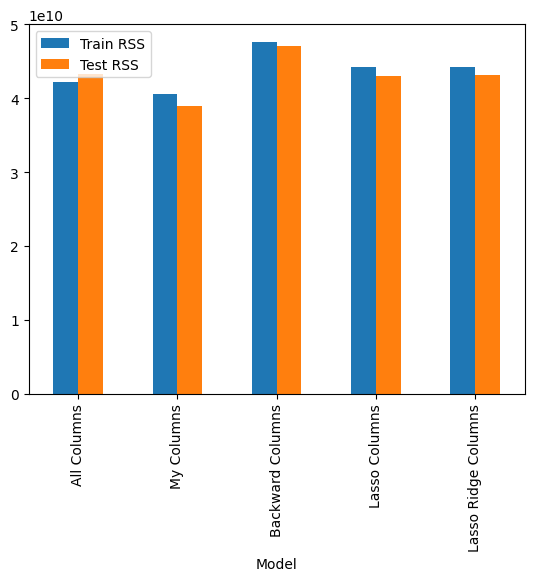

In [175]:

rss_data = {'Model': ['All Columns', 'My Columns', 'Backward Columns', 'Lasso Columns', 'Lasso Ridge Columns'],
            'Train RSS': [all_columns_rss_train, my_columns_rss_train, backward_columns_rss_train, lasso_columns_rss_train, lasso_ridge_columns_rss_train],
            'Test RSS': [all_columns_rss_test, my_columns_rss_test, backward_columns_rss_test, lasso_columns_rss_test, lasso_ridge_columns_rss_test]}
df_rss = pd.DataFrame(rss_data)


df_rss.plot(x='Model', y=['Train RSS', 'Test RSS'], kind='bar')

## Wnioski z uczenia modeli
Wszystkie srednie bledy uczenia i testowania zostaly obliczone za pomoca walidacji krzyzowej przy pieciokrotnym przetasowaniu danych.

## Model z wszystkimi poczatkowymi cechami (17):
Sredni blad uczenia wynosi okolo 42 miliardy.

Sredni blad testowania wynosi okolo 43 miliardy.

Model z wszystkimi cechami moze wykazywac nieco gorsze oszacowania na danych testowych, co moze sugerowac nadmierna zlozonosc modelu lub wystepowanie nadmiernego dopasowania do danych treningowych

## Model z wszystkimi + moje cechy (22)
Sredni blad uczenia wynosi okolo 40 miliardy.

Sredni blad testowania wynosi okolo 38 miliardy.

Dodanie moich cech do modelu z pełnym zestawem cech pozwoliło na zmniejszenie błędu na danych testowych, co sugeruje, że moje cechy są bardziej informacyjne dla modelu niż oryginalne cechy.

## Model z cechami wybranymi metoda krokowa w tyl (5)
Sredni blad uczenia wynosi okolo 48 miliardy.

Sredni blad testowania wynosi okolo 47 miliardy.

Model zaledwie z piecioma cechami wybranymi wstecznie wydaje sie miec wysoki blad na danych treningowych i testowych, co sugeruje, ze ta metoda selekcji cech moze nie byc najlepszym wyborem dla tego zbioru danych.

## Model z cechami wybranymi za pomoca regresji lasso (15)
Sredni blad uczenia wynosi okolo 44 miliardy.

Sredni blad testowania wynosi okolo 43 miliardy.

Lasso wydaje sie wybierac zestaw cech, ktory pozwala na uzyskanie wynikow porownywalnych do modelu z wszystkimi cechami, ale z mniejsza liczba cech.

## Model z cechami wybranymi za pomoca regresji lasso oraz wspolczynnikami regresji grzbietowej (15)
Sredni blad uczenia wynosi okolo 44 miliardy.

Sredni blad testowania wynosi okolo 43 miliardy.

Dodanie regularyzacji Ridge do Lasso nie wydaje sie znaczaco zmieniac wynikow w porownaniu do samego Lasso.

## Podsumowanie
Ogolnie rzecz biorac, modele z mniejsza liczba cech wydaja sie osiagac lepsze wyniki na danych testowych w porownaniu z modelem z pelnym zestawem cech. Modele z mala liczba cech moga byc bardziej elastyczne i mniej narazone na nadmierne dopasowanie, co prowadzi do lepszych wynikow na nowych danych. Selekcja cech wydaje się kluczowa dla polepszenia wyników predykcyjnych. 

Gdybym wybral inne cechy (dajace mniej istotnych informacji do przewidzenia ceny domu) prawdopodobnie model 2 spisalby sie duzo gorzej w porownaniu do innych modeli.
